In [1]:
# Package imports# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [4]:
# Get only the cubes that have our line of interest in them
mol_tag = 26504
cubes, tbl = fetch_cubes(cubefns, catalog='CDMS', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=11>
    FREQ      ERR    LGINT    DR     ELO     GUP  MOLWT  TAG  QNFMT   Ju    Ku    vu   F1u   F2u   F3u    Jl    Kl    vl   F1l   F2l   F3l     name    Lab 
    MHz       MHz   MHz nm2         1 / cm          u                                                                                                      
  float64   float64 float64 int64  float64  int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64    str9    bool
----------- ------- ------- ----- --------- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- --------- -----
 112101.656    0.05 -8.0612     2 2042.4216     2    26  5041   234     1     1     1     1    --    --     0     1     1     2    --    -- CN, v=0,1  True
 112128.989    0.05  -8.069     2 2042.4222     4    26  5041   234     1     1     1     2    --    --     0     1     1     1    --    -- CN, v=0,1  True
 112148.503    0.05 -7.9593     2 2042.4216  

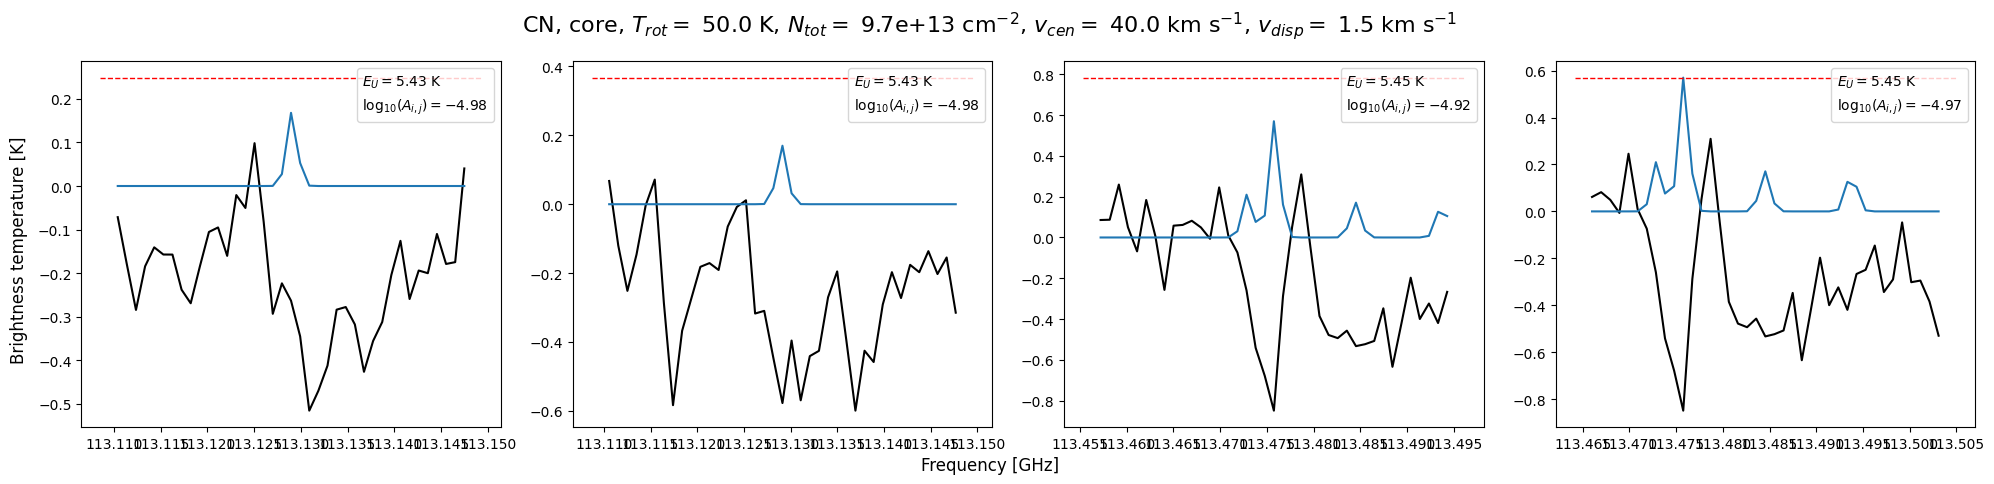

In [14]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 9.7e+13, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=5, 
               nrows=1, ncols=4, parse_loc=False, line_by_line=True, name_for_plot=f'CN', extr_type="coord", crd=crd,
               show_2_sigma=True)

In [6]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

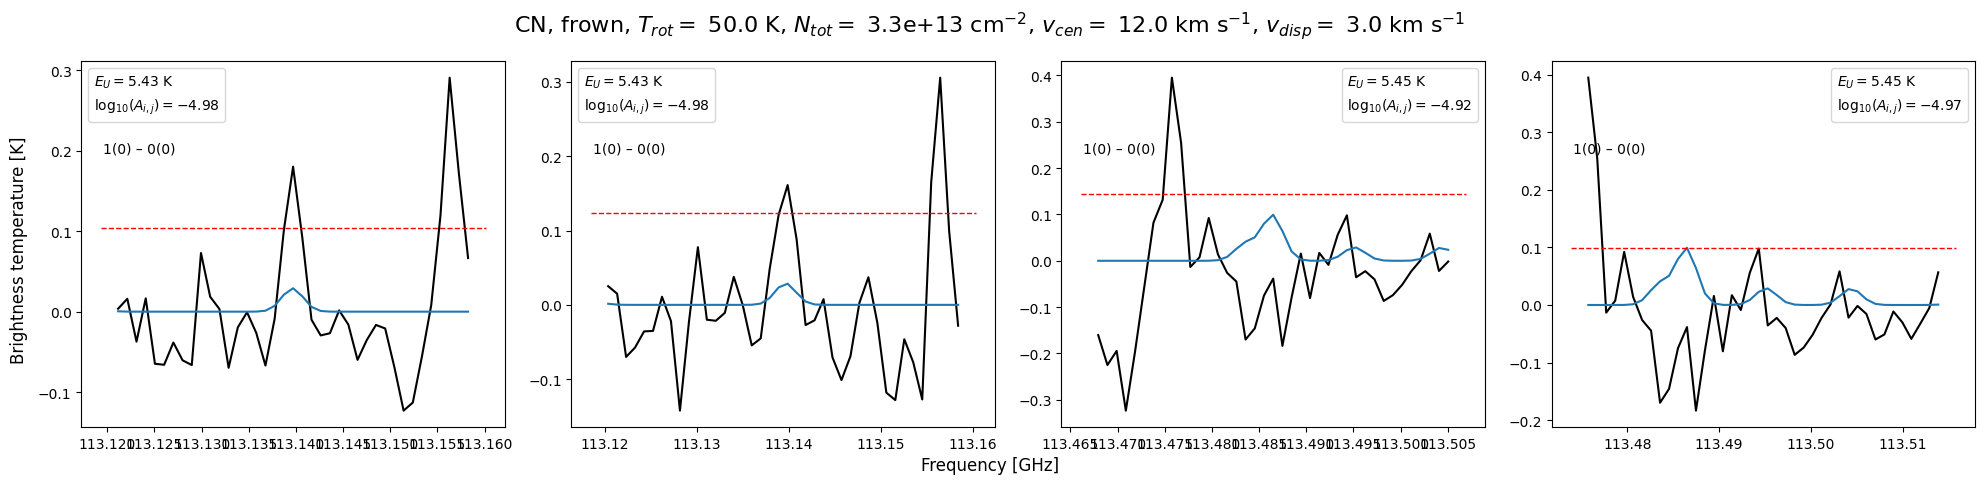

In [25]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 50., N_tot = 3.3e+13, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=5, 
                       nrows=1, ncols=4, parse_loc=False, ret_tbl=True, line_by_line=True, name_for_plot=f'CN', extr_type="reg", 
                       just_data=False, show_2_sigma=True, return_freqs=True)

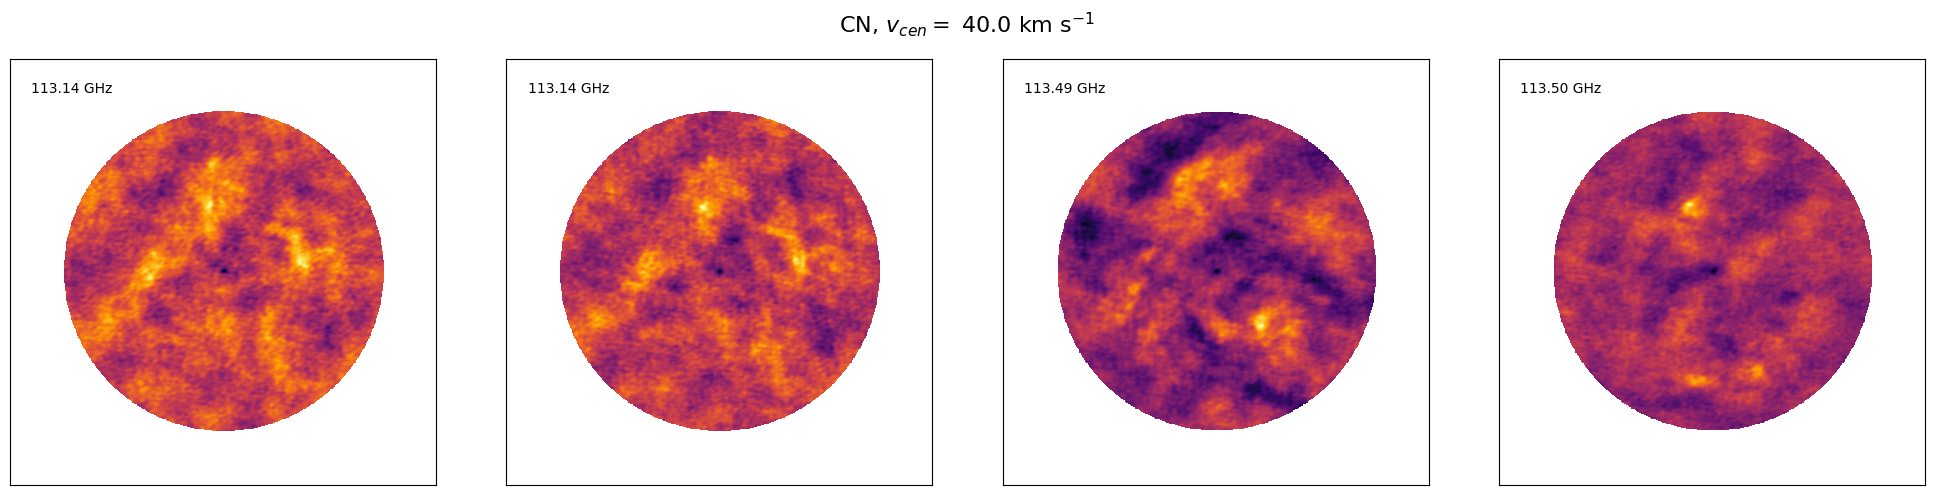

In [16]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40*u.km/u.s, fig_width=20, fig_height=5, nrows=1, ncols=4, name_for_plot=f'CN')

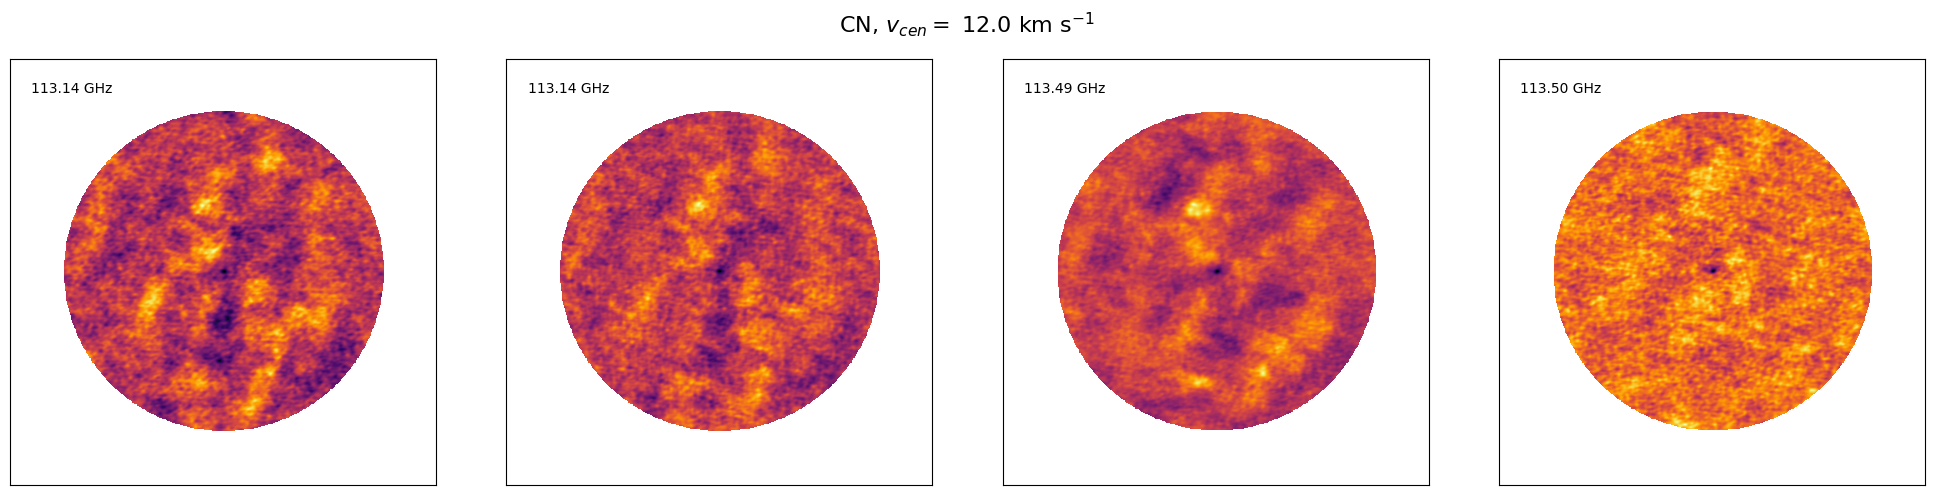

In [17]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12*u.km/u.s, fig_width=20, fig_height=5, nrows=1, ncols=4, name_for_plot=f'CN')